CMIP6 has added a new scenario – SSP3-7.0 – which lies right in the middle of the range of baseline outcomes produced by energy system models. Now modellers can examine worst case (SSP5-8.5), middle of the road (SSP3-7.0) and more optimistic (SSP4-6.0) outcomes when modelling how the world might warm in a world that fails to enact any climate policies.

SSP4-3.4 is another new scenario that tries to explore the space between scenarios that generally limit warming to below 2C (RCP2.6 / SSP1-2.6) and around 3C (RCP4.5 / SSP2-4.5) by 2100. It will help scientists better assess the impacts of warming if societies rapidly reduce emissions, but fail to mitigate fast enough to limit warming to below 2C.

SSP5-3.4 OS is an overshoot scenario (OS) where emissions follow a worst-case SSP5-8.5 pathway until 2040, after which they decline extremely rapidly with a lot of late-century use of negative emissions.

Finally, SSP1-1.9 is a scenario intended to limit warming to below 1.5C by 2100 above pre-industrial levels. It was added in the aftermath of the Paris Agreement when countries agreed to pursue efforts to limit the temperature increase to 1.5C. The energy models and simple climate models developed to limit warming to 1.5C played a big role in the special report on 1.5C that the IPCC published in 2018. These new CMIP6 scenarios will now allow full climate models to explore climate changes and impacts at around 1.5C warming.

CMIP6 features new scenarios that result in 2100 forcing similar to the CMIP5 RCP scenarios. However, even though their end-of-century forcing is the same, the emissions pathways and mix of CO2 and non-CO2 emissions are different.

In [90]:
import pandas as pd
import numpy as np
import xarray as xr
import zipfile
import os
from glob import glob

import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats as sc
from myfunct1 import *

%matplotlib inline
hist_path = os.chdir('/home/receiver/Desktop/Data/CMIP6')
hist_path = os.getcwd()

SSP1_1_9_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp1_1_9)')
SSP1_1_9_path = os.getcwd()

SSP1_2_6_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp1_2_6)')
SSP1_2_6_path = os.getcwd()

SSP3_7_0_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp3_7_0)')
SSP3_7_0_path = os.getcwd()

SSP4_3_4_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp4_3_4)')
SSP4_3_4_path = os.getcwd()

SSP5_8_5_path = os.chdir('/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp5_8_5)')
SSP5_8_5_path = os.getcwd()


In [91]:
from warnings import filterwarnings
filterwarnings('ignore')

from distributed import Client
client = Client(n_workers = 4, threads_per_worker = 1, memory_limit = '2GB')
client

Client Scheduler: tcp://127.0.0.1:36707 Dashboard: http://127.0.0.1:43405/status,Cluster Workers: 4 Cores: 4 Memory: 8.00 GB


In [92]:
hist_mod = ['access_cm2','bcc_csm2_mr','cesm2','cmcc_esm2','cnrm_cm6_1','cnrm_esm2_1','ec_earth3_veg_lr','fgoals_g3',
          'gfdl_esm4','hadgem3_gc31_ll','iitm_esm','inm_cm4_8','inm_cm5_0','ipsl_cm5a2_inca','ipsl_cm6a_lr','kace_1_0_g', 
          'miroc6','mpi_esm1_2_lr','miroc_es2l','mri_esm2_0','noresm2_mm','taiesm1','ukesm1_0_ll']
hist_mod = sorted(hist_mod)

SSP1_1_9_mod = ['cmip6_download_canesm5','cmip6_download_ec_earth3_veg_lr','cmip6_download_fgoals_g3', 'cmip6_download_gfdl_esm4', 'cmip6_download_ipsl_cm6a_lr', 'cmip6_download_miroc6', 
          'cmip6_download_miroc_es2l', 'cmip6_download_mri_esm2_0', 'cmip6_download_ukesm1_0_ll']
SSP1_1_9_mod = sorted(SSP1_1_9_mod)


SSP1_2_6_mod = ['cmip6_download_access_cm2', 'cmip6_download_bcc_csm2_mr', 'cmip6_download_canesm5', 'cmip6_download_cnrm_esm2_1',
          'cmip6_download_cesm2', 'cmip6_download_cmcc_esm2', 'cmip6_download_cnrm_cm6_1', 'cmip6_download_ec_earth3_veg_lr',
         'cmip6_download_fgoals_g3','cmip6_download_gfdl_esm4', 'cmip6_download_hadgem3_gc31_ll', 'cmip6_download_iitm_esm',
         'cmip6_download_inm_cm4_8', 'cmip6_download_inm_cm5_0', 'cmip6_download_ipsl_cm5a2_inca','cmip6_download_ipsl_cm6a_lr',
         'cmip6_download_kace_1_0_g', 'cmip6_download_kiost_esm','cmip6_download_miroc6', 'cmip6_download_miroc_es2l',
         'cmip6_download_mpi_esm1_2_lr','cmip6_download_mri_esm2_0','cmip6_download_noresm2_mm','cmip6_download_ukesm1_0_ll']
SSP1_2_6_mod = sorted(SSP1_2_6_mod)


SSP3_7_0_mod = ['cmip6_download_access_cm2','cmip6_download_bcc_csm2_mr','cmip6_download_canesm5','cmip6_download_cesm2','cmip6_download_cesm2_waccm','cmip6_download_cmcc_cm2_sr5','cmip6_download_cnrm_cm6_1','cmip6_download_cnrm_esm2_1',
          'cmip6_download_ec_earth3_veg_lr','cmip6_download_fgoals_g3','cmip6_download_gfdl_esm4','cmip6_download_iitm_esm','cmip6_download_inm_cm4_8','cmip6_download_inm_cm5_0','cmip6_download_ipsl_cm5a2_inca','cmip6_download_ipsl_cm6a_lr', 
          'cmip6_download_kace_1_0_g','cmip6_download_miroc6','cmip6_download_miroc_es2l','cmip6_download_mpi_esm1_2_lr','cmip6_download_mri_esm2_0','cmip6_download_noresm2_mm','cmip6_download_ukesm1_0_ll']
SSP3_7_0_mod = sorted(SSP3_7_0_mod)


SSP4_3_4_mod = ['cmip6_download_canesm5', 'cmip6_download_cnrm_esm2_1', 'cmip6_download_ipsl_cm6a_lr',
          'cmip6_download_miroc6', 'cmip6_download_mri_esm2_0', 'cmip6_download_ukesm1_0_ll']
SSP4_3_4_mod = sorted(SSP4_3_4_mod)


SSP5_8_5_mod = ['cmip6_download_access_cm2', 'cmip6_download_bcc_csm2_mr', 'cmip6_download_canesm5', 'cmip6_download_cesm2', 'cmip6_download_cesm2_waccm', 'cmip6_download_cmcc_cm2_sr5', 'cmip6_download_cmcc_esm2', 'cmip6_download_cnrm_cm6_1', 'cmip6_download_cnrm_cm6_1_hr', 'cmip6_download_cnrm_esm2_1', 'cmip6_download_ec_earth3_veg_lr',
         'cmip6_download_fgoals_g3', 'cmip6_download_gfdl_esm4', 'cmip6_download_hadgem3_gc31_ll', 'cmip6_download_iitm_esm', 'cmip6_download_inm_cm4_8', 'cmip6_download_inm_cm5_0', 'cmip6_download_ipsl_cm6a_lr', 'cmip6_download_kace_1_0_g', 
         'cmip6_download_miroc6', 'cmip6_download_miroc_es2l', 'cmip6_download_mpi_esm1_2_lr', 'cmip6_download_mri_esm2_0', 'cmip6_download_nesm3', 'cmip6_download_noresm2_mm', 'cmip6_download_taiesm1', 'cmip6_download_ukesm1_0_ll']
SSP5_8_5_mod = sorted(SSP5_8_5_mod)

exp='Projection'
ystart=2015; yend=2100

zones = ['Guinea Coast','Sahel','Savanna']

In [263]:
SSP5_8_5_path

'/home/receiver/Desktop/Data/CMIP6/Future Projection(ssp5_8_5)'

In [93]:
#group values into various extreme events and return count values and average/mean values for each event
def count_avg(ws):
    grouped_da_RAI = ws
    
    for class_name in classification:
        if (class_name == 'Drought'):
            n = grouped_da_RAI.where((grouped_da_RAI <= -1)).count().values.tolist()
            n2 = grouped_da_RAI.where((grouped_da_RAI <= -1)).reduce(np.nanmean).values.tolist()
            count_val.append(n)
            avg_val.append(n2)
            
        elif(class_name == 'Normal'):
            n = grouped_da_RAI.where((grouped_da_RAI >-1) & (grouped_da_RAI< 1)).count().values.tolist()
            count_val.append(n)
            n2 = grouped_da_RAI.where((grouped_da_RAI > -1) & (grouped_da_RAI< 1)).reduce(np.nanmean).values.tolist()
            avg_val.append(n2)

        else:
            n =grouped_da_RAI.where((grouped_da_RAI >= 1)).count().values.tolist()
            count_val.append(n)
            n2 = grouped_da_RAI.where((grouped_da_RAI >= 1)).reduce(np.nanmean).values.tolist()
            avg_val.append(n2)
    
    final_count[mod] = count_val
    f_count = pd.DataFrame(final_count).T
    f_count.columns=classification
    final_avg[mod] = avg_val
    f_avg = pd.DataFrame(final_avg).T
    f_avg.columns=classification
    return f_count, f_avg 



SAI

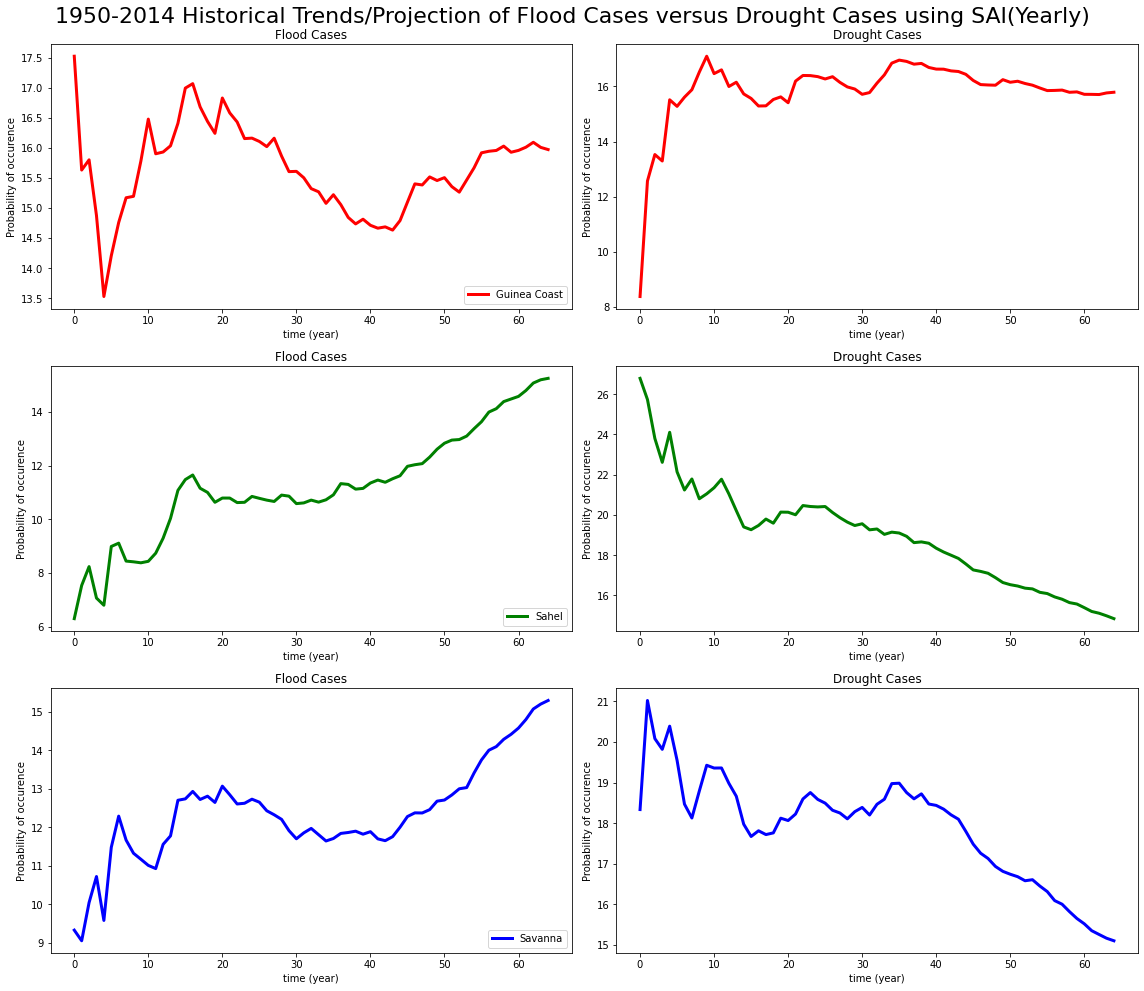

In [61]:
hist_GC_fld_output=np.ones([len(hist_mod),86])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),86])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),86])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),86])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),86])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),86])*np.nan
for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_SAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_SAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_SAI[hist_mod[i]].values
        

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(hist_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='Guinea Coast')
axes[0,0].legend(loc='lower right')
axes[0,0].set(title='Flood Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')
axes[1,0].plot(hist_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'Sahel')
axes[1,0].legend(loc='lower right')
axes[1,0].set(title='Flood Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')
axes[2,0].plot(hist_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'Savanna')
axes[2,0].legend(loc='lower right')
axes[2,0].set(title='Flood Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(hist_GC_dght_output.mean(axis=0), color='r', linewidth=3, label = 'Guinea Coast')
axes[0,1].set(title='Drought Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')
axes[1,1].plot(hist_SH_dght_output.mean(axis=0), color='g', linewidth=3, label = 'Sahel')
axes[1,1].set(title='Drought Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')
axes[2,1].plot(hist_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label='Savanna')
axes[2,1].set(title='Drought Cases', xlabel= 'time (year)', ylabel = 'Probability of occurence')

fig.suptitle('1950-2014 Historical Trends/Projection of Flood Cases versus Drought Cases using SAI(Yearly)', fontsize=22)

fig.tight_layout()
fig.show()

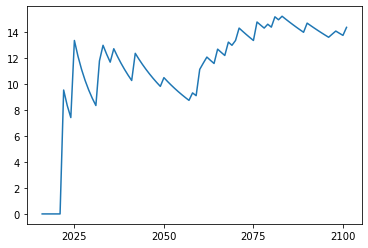

In [125]:
SSP1_2_6_SAH_fld_RAI['cmip6_download_canesm5']

plt.plot(da_RR.time, SSP1_2_6_SAH_fld_SAI['cmip6_download_canesm5'])

In [294]:
#fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,12))
#ax = axes.flatten()

from collections import OrderedDict
hist_GC_dght_RAI = OrderedDict(); SSP1_1_9_GC_dght_RAI = OrderedDict(); SSP1_2_6_GC_dght_RAI = OrderedDict(); SSP3_7_0_GC_dght_RAI = OrderedDict()
hist_GC_dght_SAI = OrderedDict(); SSP1_1_9_GC_dght_SAI = OrderedDict(); SSP1_2_6_GC_dght_SAI = OrderedDict(); SSP3_7_0_GC_dght_SAI = OrderedDict()

hist_SH_dght_RAI = OrderedDict(); SSP1_1_9_SH_dght_RAI = OrderedDict(); SSP1_2_6_SH_dght_RAI = OrderedDict(); SSP3_7_0_SH_dght_RAI = OrderedDict()
hist_SH_dght_SAI = OrderedDict(); SSP1_1_9_SH_dght_SAI = OrderedDict(); SSP1_2_6_SH_dght_SAI = OrderedDict(); SSP3_7_0_SH_dght_SAI = OrderedDict()

hist_SAH_dght_RAI = OrderedDict(); SSP1_1_9_SAH_dght_RAI = OrderedDict(); SSP1_2_6_SAH_dght_RAI = OrderedDict(); SSP3_7_0_SAH_dght_RAI = OrderedDict()
hist_SAH_dght_SAI = OrderedDict(); SSP1_1_9_SAH_dght_SAI = OrderedDict(); SSP1_2_6_SAH_dght_SAI = OrderedDict(); SSP3_7_0_SAH_dght_SAI = OrderedDict()

hist_GC_fld_RAI = OrderedDict(); SSP1_1_9_GC_fld_RAI = OrderedDict(); SSP1_2_6_GC_fld_RAI = OrderedDict(); SSP3_7_0_GC_fld_RAI = OrderedDict()
hist_GC_fld_SAI = OrderedDict(); SSP1_1_9_GC_fld_SAI = OrderedDict(); SSP1_2_6_GC_fld_SAI = OrderedDict(); SSP3_7_0_GC_fld_SAI = OrderedDict()

hist_SH_fld_RAI = OrderedDict(); SSP1_1_9_SH_fld_RAI = OrderedDict(); SSP1_2_6_SH_fld_RAI = OrderedDict(); SSP3_7_0_SH_fld_RAI = OrderedDict()
hist_SH_fld_SAI = OrderedDict(); SSP1_1_9_SH_fld_SAI = OrderedDict(); SSP1_2_6_SH_fld_SAI = OrderedDict(); SSP3_7_0_SH_fld_SAI = OrderedDict()

hist_SAH_fld_RAI = OrderedDict(); SSP1_1_9_SAH_fld_RAI = OrderedDict(); SSP1_2_6_SAH_fld_RAI = OrderedDict(); SSP3_7_0_SAH_fld_RAI = OrderedDict()
hist_SAH_fld_SAI = OrderedDict(); SSP1_1_9_SAH_fld_SAI = OrderedDict(); SSP1_2_6_SAH_fld_SAI = OrderedDict(); SSP3_7_0_SAH_fld_SAI = OrderedDict()

SSP4_3_4_GC_dght_RAI = OrderedDict(); SSP5_8_5_GC_dght_RAI = OrderedDict()
SSP4_3_4_GC_dght_SAI = OrderedDict(); SSP5_8_5_GC_dght_SAI = OrderedDict()

SSP4_3_4_SH_dght_RAI = OrderedDict(); SSP5_8_5_SH_dght_RAI = OrderedDict()
SSP4_3_4_SH_dght_SAI = OrderedDict(); SSP5_8_5_SH_dght_SAI = OrderedDict()

SSP4_3_4_SAH_dght_RAI = OrderedDict(); SSP5_8_5_SAH_dght_RAI = OrderedDict()
SSP4_3_4_SAH_dght_SAI = OrderedDict(); SSP5_8_5_SAH_dght_SAI = OrderedDict()

SSP4_3_4_GC_fld_RAI = OrderedDict(); SSP5_8_5_GC_fld_RAI = OrderedDict()
SSP4_3_4_GC_fld_SAI = OrderedDict(); SSP5_8_5_GC_fld_SAI = OrderedDict()

SSP4_3_4_SH_fld_RAI = OrderedDict(); SSP5_8_5_SH_fld_RAI = OrderedDict()
SSP4_3_4_SH_fld_SAI = OrderedDict(); SSP5_8_5_SH_fld_SAI = OrderedDict()

SSP4_3_4_SAH_fld_RAI = OrderedDict(); SSP5_8_5_SAH_fld_RAI = OrderedDict()
SSP4_3_4_SAH_fld_SAI = OrderedDict(); SSP5_8_5_SAH_fld_SAI = OrderedDict()
'''
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
'''
for j, zone in enumerate(zones):
    for i,mod in enumerate(hist_mod):
      
        file = glob(os.path.join(hist_path,'historical'+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(hist_path,mod+'/pr*'+'historical'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR1 = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR1, 'time','ordinary'); c2 = sai(da_RR1, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                hist_GC_fld_output[i] = hist_GC_fld_RAI[hist_mod[i]].values
                hist_GC_dght_output[i] = hist_GC_dght_RAI[hist_mod[i]].values
                
            except:
                a = len(hist_GC_fld_RAI[hist_mod[i]].values)
                #print(l,a)
                hist_GC_fld_output[i, :a]  = hist_GC_fld_RAI[hist_mod[i]].values
                hist_GC_dght_output[i, :a]  = hist_GC_dght_RAI[hist_mod[i]].values
                
            ax[0].plot(da_RR1.time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[0].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[1].plot(da_RR1.time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[1].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                hist_SH_fld_output[i] = hist_SH_fld_RAI[hist_mod[i]].values
                hist_SH_dght_output[i] = hist_SH_dght_RAI[hist_mod[i]].values
            except:
                a = len(hist_SH_fld_RAI[hist_mod[i]].values)
                hist_SH_fld_output[i, :a] = hist_SH_fld_RAI[hist_mod[i]].values
                hist_SH_dght_output[i, :a]  = hist_SH_dght_RAI[hist_mod[i]].values
            ax[2].plot(da_RR.time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[2].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[3].plot(da_RR.time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[3].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            hist_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            hist_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                hist_SAH_fld_output[i] = hist_SAH_fld_RAI[hist_mod[i]].values
                hist_SAH_dght_output[i] = hist_SAH_dght_RAI[hist_mod[i]].values
            except:
                a = len(hist_SAH_fld_RAI[hist_mod[i]].values)
                hist_SAH_fld_output[i, :a] = hist_SAH_fld_RAI[hist_mod[i]].values
                hist_SAH_dght_output[i, :a]  = hist_SAH_dght_RAI[hist_mod[i]].values
            ax[4].plot(da_RR.time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[4].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of flood occurence (%)')
            ax[5].plot(da_RR.time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
            ax[5].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
    for i,mod in enumerate(SSP1_1_9_mod):
        
        file = glob(os.path.join(SSP1_1_9_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_1_9_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)


        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
                SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
                
            except:
                a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
                SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
                SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
            ax[0].plot(da_RR.time, SSP1_1_9_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='Historical')
            ax[0].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[1].plot(da_RR.time, SSP1_1_9_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='Historical')   
            ax[1].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
                SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
            except:
                a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
                SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
                SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
            ax[2].plot(da_RR.time, SSP1_1_9_SH_fld_output.mean(axis=0), color='g', linewidth=3, label ='Historical')
            ax[2].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[3].plot(da_RR.time, SSP1_1_9_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='Historical')
            ax[3].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:                
                SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values 
                SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values
            except:
                a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
                #print(l,a)
                
                SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
                SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values
            ax[4].plot(da_RR.time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label ='Historical')
            ax[4].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[5].plot(da_RR.time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='Historical')
            ax[5].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
    
    for i,mod in enumerate(SSP1_2_6_mod):
                
        file = glob(os.path.join(SSP1_2_6_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_2_6_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR2 = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR2, 'time','ordinary'); c2 = sai(da_RR2, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
                 
            except:
                a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
                #print(l,a)
                SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
                
            ax[0].plot(da_RR2.time, SSP1_2_6_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[0].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[1].plot(da_RR2.time, SSP1_2_6_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[1].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''   
        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
                
            except:
                a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
                SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
            ax[2].plot(da_RR.time, SSP1_2_6_SH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[2].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[3].plot(da_RR.time, SSP1_2_6_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[3].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_2_6_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_2_6_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
                
            except:
                a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
                SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
                SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
            ax[4].plot(da_RR.time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[4].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Flood occurence (%)')
            ax[5].plot(da_RR.time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='b', linewidth=3)
            ax[5].set(title=zone ,xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            '''
            
    for i,mod in enumerate(SSP3_7_0_mod):

        file = glob(os.path.join(SSP3_7_0_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP3_7_0_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)



        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR3 = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR3, 'time','ordinary'); c2 = sai(da_RR3, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                #print(l,a)
                SSP3_7_0_GC_fld_output[i, :a-2]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_GC_dght_output[i, :a-2]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            ax[0].plot(da_RR3.time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[1].plot(da_RR3.time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='Projection')  
            '''

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR4 = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR4, 'time','ordinary'); c2 = sai(da_RR4, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
            ax[2].plot(da_RR.time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[3].plot(da_RR.time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical') 
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR5 = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR5, 'time','ordinary'); c2 = sai(da_RR5, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
            ax[4].plot(da_RR.time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[5].plot(da_RR.time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
          '''
    for i,mod in enumerate(SSP4_3_4_mod):

        file = glob(os.path.join(SSP4_3_4_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP4_3_4_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)



        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                #print(l,a)
                SSP3_7_0_GC_fld_output[i, :a-2]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_GC_dght_output[i, :a-2]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            ax[0].plot(da_RR3.time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[1].plot(da_RR3.time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='Projection')  
            '''

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
            ax[2].plot(da_RR.time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[3].plot(da_RR.time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical') 
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
            ax[4].plot(da_RR.time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[5].plot(da_RR.time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            '''
            
    for i,mod in enumerate(SSP5_8_5_mod):

        file = glob(os.path.join(SSP5_8_5_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP5_8_5_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)



        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                #print(l,a)
                SSP3_7_0_GC_fld_output[i, :a-2]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_GC_dght_output[i, :a-2]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values

            ax[0].plot(da_RR3.time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[1].plot(da_RR3.time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='Projection')  
            '''

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
            ax[2].plot(da_RR.time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[3].plot(da_RR.time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical') 
            '''
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1D').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            '''
            try:
                SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values

                SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values

            except:
                a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
                SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
                SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
            ax[4].plot(da_RR.time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            ax[5].plot(da_RR.time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label ='Historical')
            '''
#fig.suptitle('2015-2100 Trends in Flood and Drought Cases using RAI(Daily)- SSP1-1-9 Scenario', fontsize=22)
#fig.tight_layout()
#fig.show()
#save_plot('/home/receiver/Desktop/Data/plots/plots(trends)/','SSP1_1_9 Drt Vrs Fld Trnds RAI(Daily_2015-2100)')

#### RAI CALCULATION

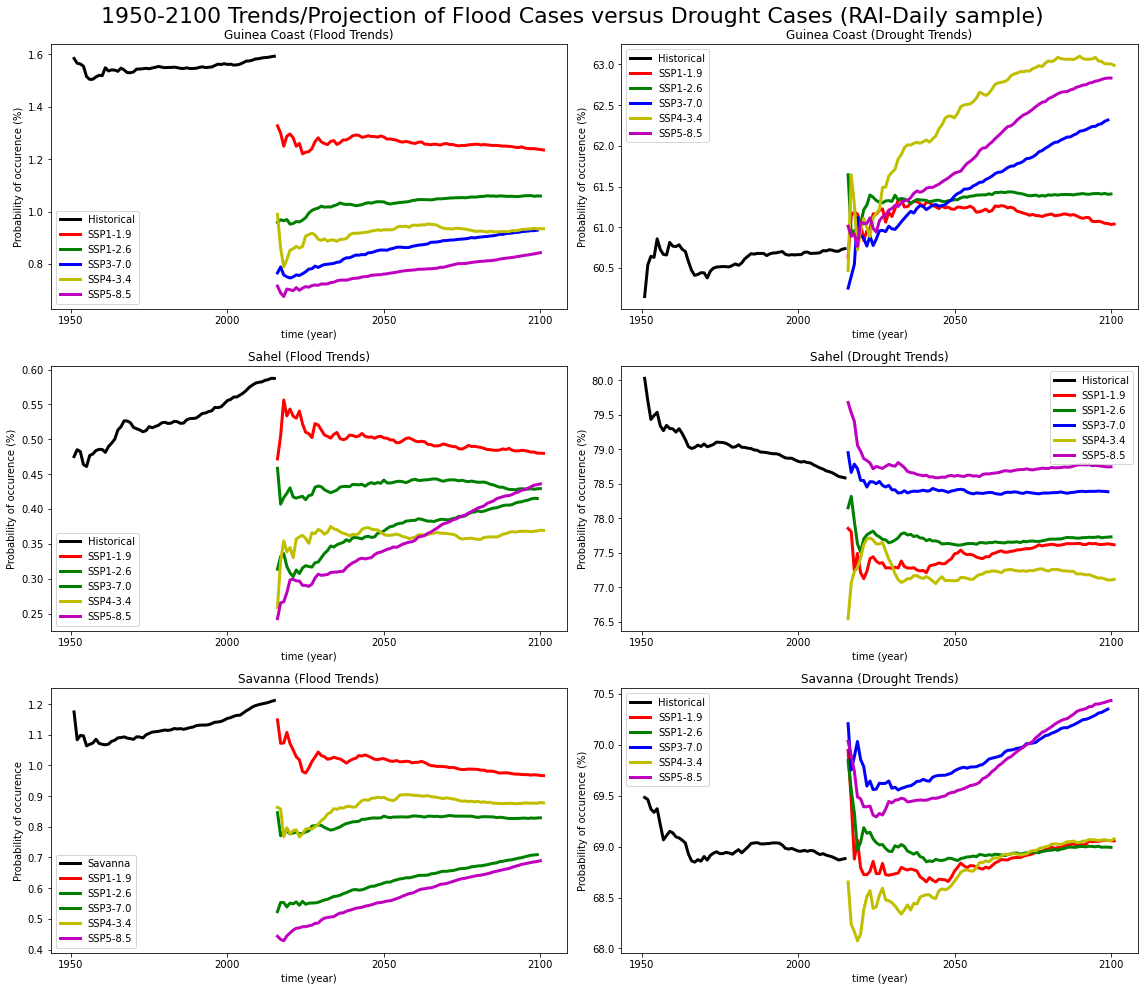

In [297]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_RAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_RAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_RAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='lower left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='lower left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend(loc='upper left')
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='upper left')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (RAI-Daily sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - RAI')

### SAI

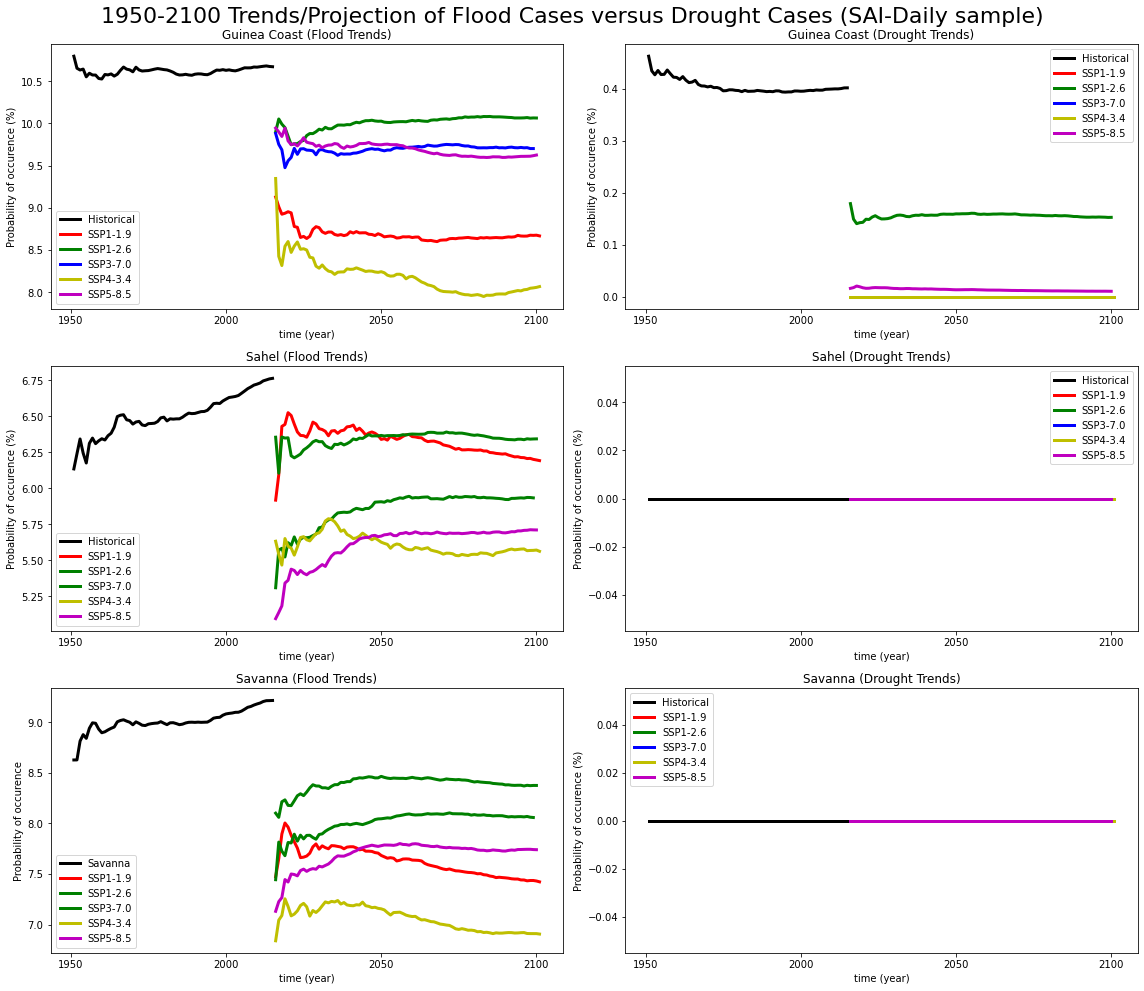

In [298]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_SAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_SAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_SAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='lower left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='lower left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend()
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='upper left')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (SAI-Daily sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - SAI')

### Monthly

In [353]:
from collections import OrderedDict
hist_GC_dght_RAI = OrderedDict(); SSP1_1_9_GC_dght_RAI = OrderedDict(); SSP1_2_6_GC_dght_RAI = OrderedDict(); SSP3_7_0_GC_dght_RAI = OrderedDict()
hist_GC_dght_SAI = OrderedDict(); SSP1_1_9_GC_dght_SAI = OrderedDict(); SSP1_2_6_GC_dght_SAI = OrderedDict(); SSP3_7_0_GC_dght_SAI = OrderedDict()

hist_SH_dght_RAI = OrderedDict(); SSP1_1_9_SH_dght_RAI = OrderedDict(); SSP1_2_6_SH_dght_RAI = OrderedDict(); SSP3_7_0_SH_dght_RAI = OrderedDict()
hist_SH_dght_SAI = OrderedDict(); SSP1_1_9_SH_dght_SAI = OrderedDict(); SSP1_2_6_SH_dght_SAI = OrderedDict(); SSP3_7_0_SH_dght_SAI = OrderedDict()

hist_SAH_dght_RAI = OrderedDict(); SSP1_1_9_SAH_dght_RAI = OrderedDict(); SSP1_2_6_SAH_dght_RAI = OrderedDict(); SSP3_7_0_SAH_dght_RAI = OrderedDict()
hist_SAH_dght_SAI = OrderedDict(); SSP1_1_9_SAH_dght_SAI = OrderedDict(); SSP1_2_6_SAH_dght_SAI = OrderedDict(); SSP3_7_0_SAH_dght_SAI = OrderedDict()

hist_GC_fld_RAI = OrderedDict(); SSP1_1_9_GC_fld_RAI = OrderedDict(); SSP1_2_6_GC_fld_RAI = OrderedDict(); SSP3_7_0_GC_fld_RAI = OrderedDict()
hist_GC_fld_SAI = OrderedDict(); SSP1_1_9_GC_fld_SAI = OrderedDict(); SSP1_2_6_GC_fld_SAI = OrderedDict(); SSP3_7_0_GC_fld_SAI = OrderedDict()

hist_SH_fld_RAI = OrderedDict(); SSP1_1_9_SH_fld_RAI = OrderedDict(); SSP1_2_6_SH_fld_RAI = OrderedDict(); SSP3_7_0_SH_fld_RAI = OrderedDict()
hist_SH_fld_SAI = OrderedDict(); SSP1_1_9_SH_fld_SAI = OrderedDict(); SSP1_2_6_SH_fld_SAI = OrderedDict(); SSP3_7_0_SH_fld_SAI = OrderedDict()

hist_SAH_fld_RAI = OrderedDict(); SSP1_1_9_SAH_fld_RAI = OrderedDict(); SSP1_2_6_SAH_fld_RAI = OrderedDict(); SSP3_7_0_SAH_fld_RAI = OrderedDict()
hist_SAH_fld_SAI = OrderedDict(); SSP1_1_9_SAH_fld_SAI = OrderedDict(); SSP1_2_6_SAH_fld_SAI = OrderedDict(); SSP3_7_0_SAH_fld_SAI = OrderedDict()

SSP4_3_4_GC_dght_RAI = OrderedDict(); SSP5_8_5_GC_dght_RAI = OrderedDict()
SSP4_3_4_GC_dght_SAI = OrderedDict(); SSP5_8_5_GC_dght_SAI = OrderedDict()

SSP4_3_4_SH_dght_RAI = OrderedDict(); SSP5_8_5_SH_dght_RAI = OrderedDict()
SSP4_3_4_SH_dght_SAI = OrderedDict(); SSP5_8_5_SH_dght_SAI = OrderedDict()

SSP4_3_4_SAH_dght_RAI = OrderedDict(); SSP5_8_5_SAH_dght_RAI = OrderedDict()
SSP4_3_4_SAH_dght_SAI = OrderedDict(); SSP5_8_5_SAH_dght_SAI = OrderedDict()

SSP4_3_4_GC_fld_RAI = OrderedDict(); SSP5_8_5_GC_fld_RAI = OrderedDict()
SSP4_3_4_GC_fld_SAI = OrderedDict(); SSP5_8_5_GC_fld_SAI = OrderedDict()

SSP4_3_4_SH_fld_RAI = OrderedDict(); SSP5_8_5_SH_fld_RAI = OrderedDict()
SSP4_3_4_SH_fld_SAI = OrderedDict(); SSP5_8_5_SH_fld_SAI = OrderedDict()

SSP4_3_4_SAH_fld_RAI = OrderedDict(); SSP5_8_5_SAH_fld_RAI = OrderedDict()
SSP4_3_4_SAH_fld_SAI = OrderedDict(); SSP5_8_5_SAH_fld_SAI = OrderedDict()

for j, zone in enumerate(zones):
    for i,mod in enumerate(hist_mod):
      
        file = glob(os.path.join(hist_path,'historical'+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(hist_path,mod+'/pr*'+'historical'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR1 = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR1, 'time','ordinary'); c2 = sai(da_RR1, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            hist_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            hist_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

    for i,mod in enumerate(SSP1_1_9_mod):
        
        file = glob(os.path.join(SSP1_1_9_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_1_9_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP1_2_6_mod):
                
        file = glob(os.path.join(SSP1_2_6_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_2_6_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR2 = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR2, 'time','ordinary'); c2 = sai(da_RR2, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
             
        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
           
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_2_6_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_2_6_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP3_7_0_mod):

        file = glob(os.path.join(SSP3_7_0_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP3_7_0_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR3 = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR3, 'time','ordinary'); c2 = sai(da_RR3, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR4 = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR4, 'time','ordinary'); c2 = sai(da_RR4, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR5 = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR5, 'time','ordinary'); c2 = sai(da_RR5, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP4_3_4_mod):

        file = glob(os.path.join(SSP4_3_4_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP4_3_4_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            SSP4_3_4_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

    for i,mod in enumerate(SSP5_8_5_mod):

        file = glob(os.path.join(SSP5_8_5_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP5_8_5_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
           

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1M').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

### RAI calculation

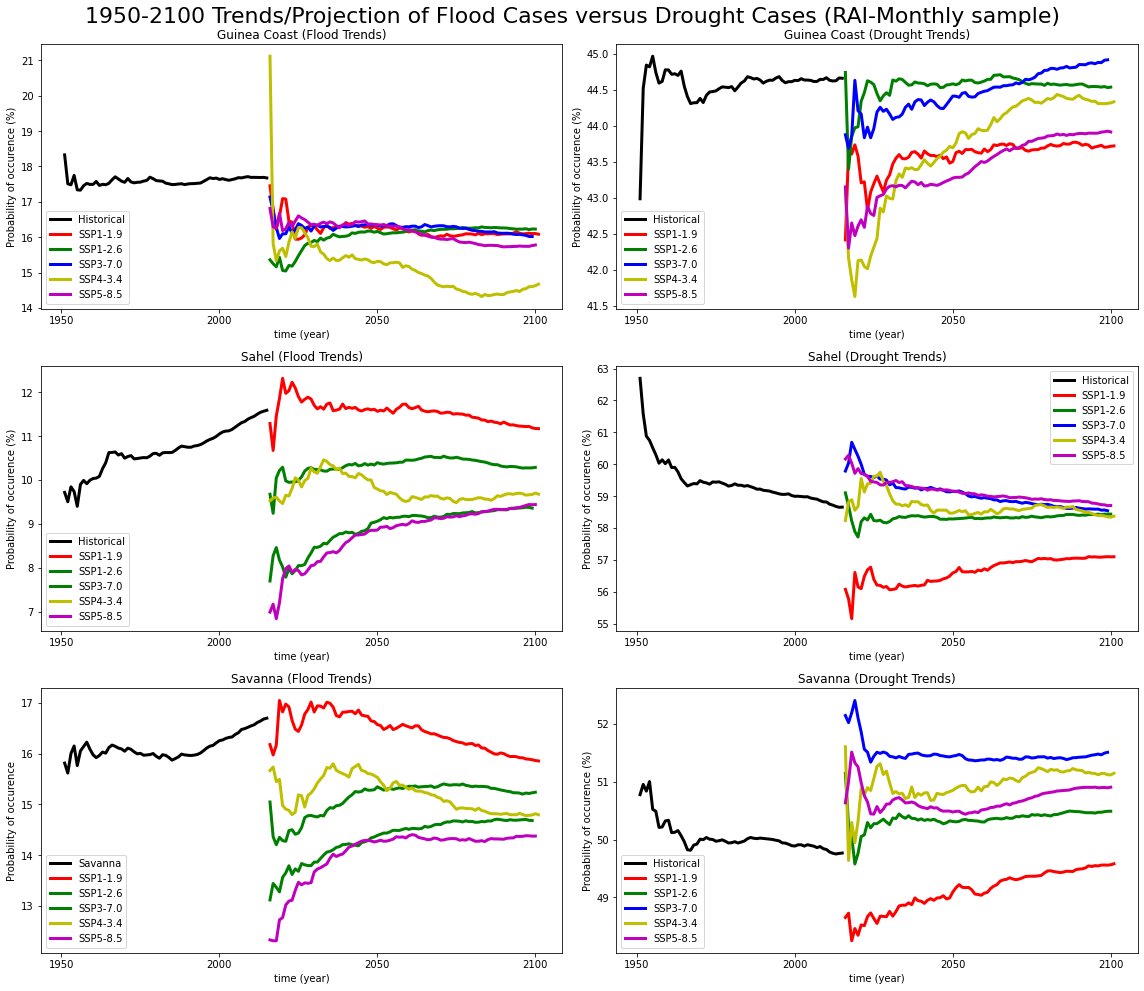

In [341]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_RAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_RAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_RAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='lower left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='lower left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend(loc='lower left')
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='lower left')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (RAI-Monthly sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - RAI(m)')

### SAI Calculation

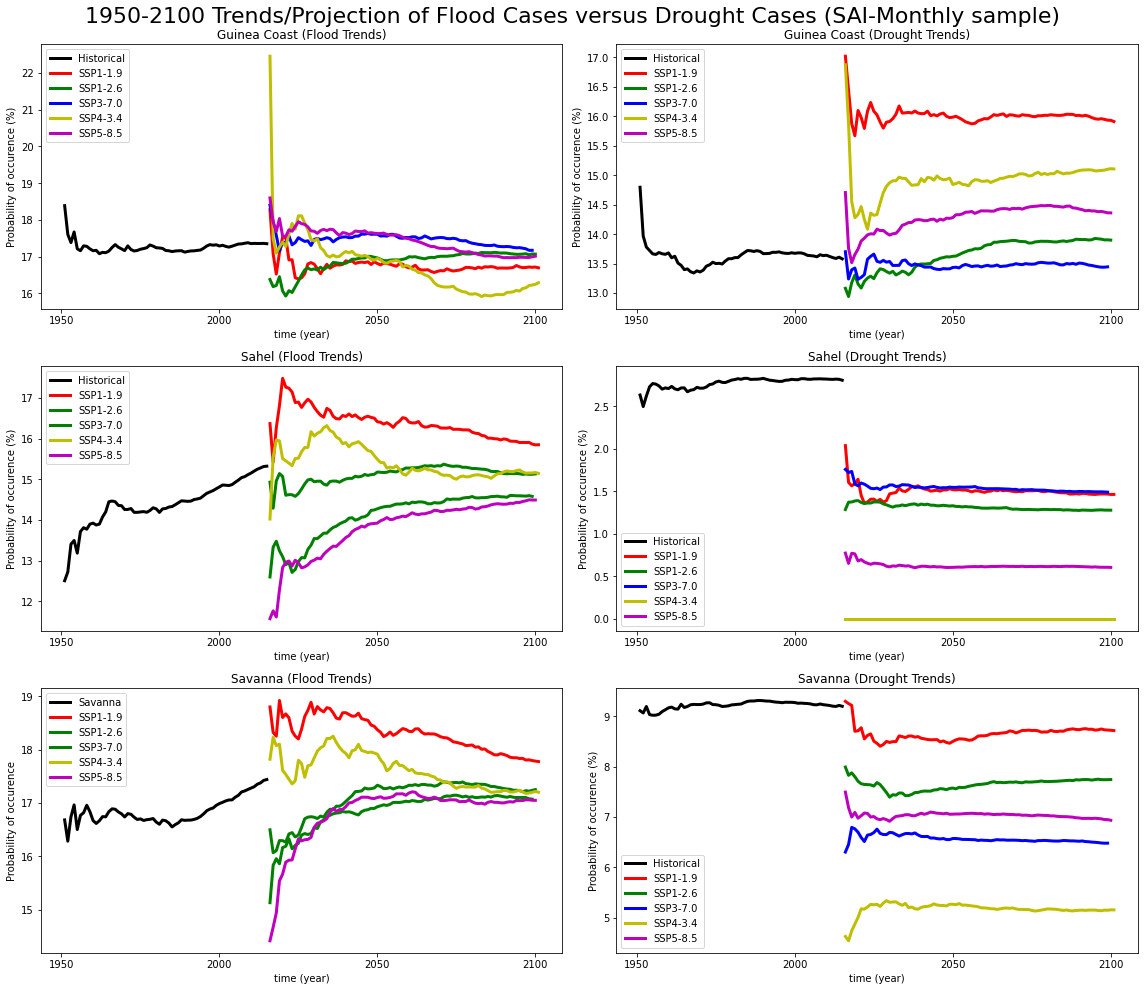

In [343]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_SAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_SAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_SAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='upper left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='upper left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend()
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='lower left')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.resample(time='Y').mean('time').time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.resample(time='Y').mean('time').time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='lower left')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (SAI-Monthly sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - SAI(m)')

In [344]:
from collections import OrderedDict
hist_GC_dght_RAI = OrderedDict(); SSP1_1_9_GC_dght_RAI = OrderedDict(); SSP1_2_6_GC_dght_RAI = OrderedDict(); SSP3_7_0_GC_dght_RAI = OrderedDict()
hist_GC_dght_SAI = OrderedDict(); SSP1_1_9_GC_dght_SAI = OrderedDict(); SSP1_2_6_GC_dght_SAI = OrderedDict(); SSP3_7_0_GC_dght_SAI = OrderedDict()

hist_SH_dght_RAI = OrderedDict(); SSP1_1_9_SH_dght_RAI = OrderedDict(); SSP1_2_6_SH_dght_RAI = OrderedDict(); SSP3_7_0_SH_dght_RAI = OrderedDict()
hist_SH_dght_SAI = OrderedDict(); SSP1_1_9_SH_dght_SAI = OrderedDict(); SSP1_2_6_SH_dght_SAI = OrderedDict(); SSP3_7_0_SH_dght_SAI = OrderedDict()

hist_SAH_dght_RAI = OrderedDict(); SSP1_1_9_SAH_dght_RAI = OrderedDict(); SSP1_2_6_SAH_dght_RAI = OrderedDict(); SSP3_7_0_SAH_dght_RAI = OrderedDict()
hist_SAH_dght_SAI = OrderedDict(); SSP1_1_9_SAH_dght_SAI = OrderedDict(); SSP1_2_6_SAH_dght_SAI = OrderedDict(); SSP3_7_0_SAH_dght_SAI = OrderedDict()

hist_GC_fld_RAI = OrderedDict(); SSP1_1_9_GC_fld_RAI = OrderedDict(); SSP1_2_6_GC_fld_RAI = OrderedDict(); SSP3_7_0_GC_fld_RAI = OrderedDict()
hist_GC_fld_SAI = OrderedDict(); SSP1_1_9_GC_fld_SAI = OrderedDict(); SSP1_2_6_GC_fld_SAI = OrderedDict(); SSP3_7_0_GC_fld_SAI = OrderedDict()

hist_SH_fld_RAI = OrderedDict(); SSP1_1_9_SH_fld_RAI = OrderedDict(); SSP1_2_6_SH_fld_RAI = OrderedDict(); SSP3_7_0_SH_fld_RAI = OrderedDict()
hist_SH_fld_SAI = OrderedDict(); SSP1_1_9_SH_fld_SAI = OrderedDict(); SSP1_2_6_SH_fld_SAI = OrderedDict(); SSP3_7_0_SH_fld_SAI = OrderedDict()

hist_SAH_fld_RAI = OrderedDict(); SSP1_1_9_SAH_fld_RAI = OrderedDict(); SSP1_2_6_SAH_fld_RAI = OrderedDict(); SSP3_7_0_SAH_fld_RAI = OrderedDict()
hist_SAH_fld_SAI = OrderedDict(); SSP1_1_9_SAH_fld_SAI = OrderedDict(); SSP1_2_6_SAH_fld_SAI = OrderedDict(); SSP3_7_0_SAH_fld_SAI = OrderedDict()

SSP4_3_4_GC_dght_RAI = OrderedDict(); SSP5_8_5_GC_dght_RAI = OrderedDict()
SSP4_3_4_GC_dght_SAI = OrderedDict(); SSP5_8_5_GC_dght_SAI = OrderedDict()

SSP4_3_4_SH_dght_RAI = OrderedDict(); SSP5_8_5_SH_dght_RAI = OrderedDict()
SSP4_3_4_SH_dght_SAI = OrderedDict(); SSP5_8_5_SH_dght_SAI = OrderedDict()

SSP4_3_4_SAH_dght_RAI = OrderedDict(); SSP5_8_5_SAH_dght_RAI = OrderedDict()
SSP4_3_4_SAH_dght_SAI = OrderedDict(); SSP5_8_5_SAH_dght_SAI = OrderedDict()

SSP4_3_4_GC_fld_RAI = OrderedDict(); SSP5_8_5_GC_fld_RAI = OrderedDict()
SSP4_3_4_GC_fld_SAI = OrderedDict(); SSP5_8_5_GC_fld_SAI = OrderedDict()

SSP4_3_4_SH_fld_RAI = OrderedDict(); SSP5_8_5_SH_fld_RAI = OrderedDict()
SSP4_3_4_SH_fld_SAI = OrderedDict(); SSP5_8_5_SH_fld_SAI = OrderedDict()

SSP4_3_4_SAH_fld_RAI = OrderedDict(); SSP5_8_5_SAH_fld_RAI = OrderedDict()
SSP4_3_4_SAH_fld_SAI = OrderedDict(); SSP5_8_5_SAH_fld_SAI = OrderedDict()

for j, zone in enumerate(zones):
    for i,mod in enumerate(hist_mod):
      
        file = glob(os.path.join(hist_path,'historical'+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(hist_path,mod+'/pr*'+'historical'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR1 = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR1, 'time','ordinary'); c2 = sai(da_RR1, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            hist_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            hist_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            hist_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            hist_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            hist_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            hist_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

    for i,mod in enumerate(SSP1_1_9_mod):
        
        file = glob(os.path.join(SSP1_1_9_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_1_9_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_1_9_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_1_9_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_1_9_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_1_9_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP1_2_6_mod):
                
        file = glob(os.path.join(SSP1_2_6_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_2_6_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR2 = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR2, 'time','ordinary'); c2 = sai(da_RR2, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
             
        elif zone == 'Sahel':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')
            
            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            SSP1_2_6_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            
            SSP1_2_6_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
           
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP1_2_6_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP1_2_6_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP1_2_6_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP1_2_6_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP3_7_0_mod):

        file = glob(os.path.join(SSP3_7_0_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP3_7_0_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR3 = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR3, 'time','ordinary'); c2 = sai(da_RR3, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR4 = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR4, 'time','ordinary'); c2 = sai(da_RR4, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR5 = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR5, 'time','ordinary'); c2 = sai(da_RR5, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP3_7_0_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP3_7_0_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP3_7_0_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP3_7_0_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
    for i,mod in enumerate(SSP4_3_4_mod):

        file = glob(os.path.join(SSP4_3_4_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP4_3_4_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP4_3_4_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP4_3_4_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP4_3_4_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            SSP4_3_4_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP4_3_4_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

    for i,mod in enumerate(SSP5_8_5_mod):

        file = glob(os.path.join(SSP5_8_5_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP5_8_5_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)

        if zone == 'Guinea Coast':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_GC_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_GC_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_GC_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_GC_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
           

        elif zone == 'Sahel':

            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('2014',str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').sum('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            SSP5_8_5_SAH_dght_RAI[mod] = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SSP5_8_5_SAH_dght_SAI[mod] = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)


            SSP5_8_5_SAH_fld_RAI[mod] = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c1['time'].size+1)*100
            SSP5_8_5_SAH_fld_SAI[mod] = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_fld_c2['time'].size+1)*100

### RAI CALC

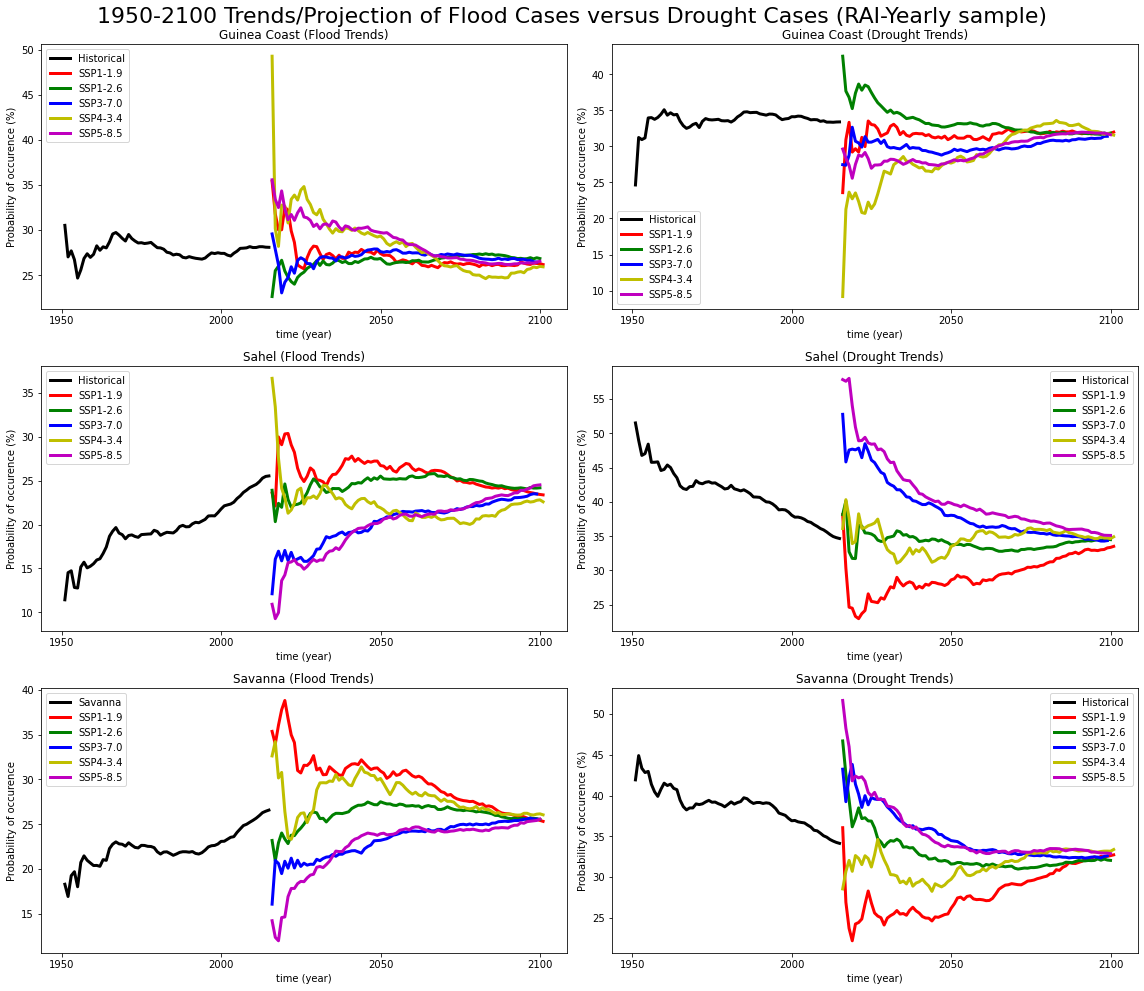

In [352]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_RAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_RAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_RAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_RAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_RAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_RAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_RAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_RAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_RAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_RAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_RAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_RAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_RAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_RAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_RAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_RAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_RAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_RAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='upper left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='upper left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend(loc='upper left')
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend(loc='lower left')
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='upper right')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (RAI-Yearly sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - RAI(y)')

### SAI

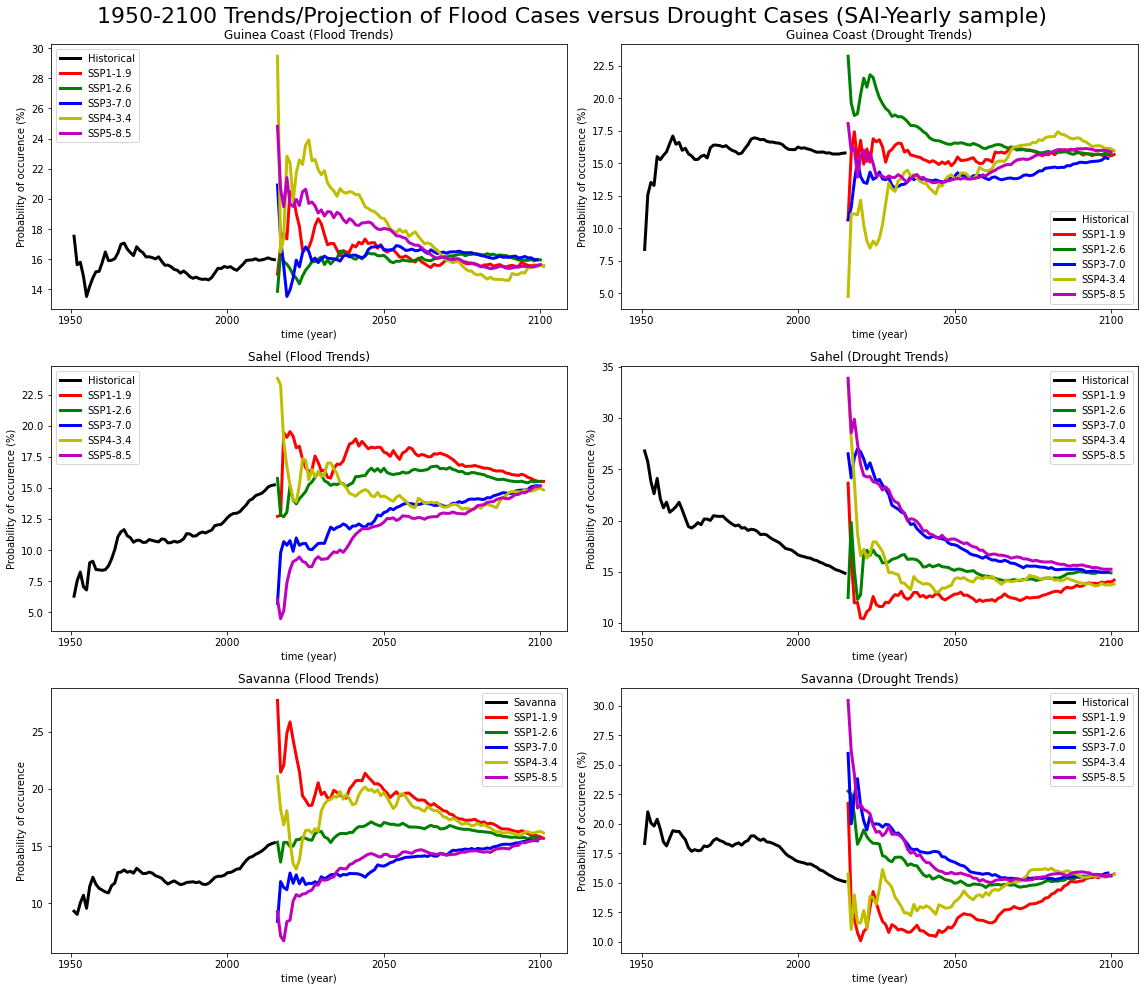

In [351]:
hist_GC_fld_output=np.ones([len(hist_mod),65])*np.nan
hist_SH_fld_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_fld_output = np.ones([len(hist_mod),65])*np.nan

hist_GC_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SH_dght_output = np.ones([len(hist_mod),65])*np.nan
hist_SAH_dght_output = np.ones([len(hist_mod),65])*np.nan

SSP1_1_9_GC_fld_output=np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_fld_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_1_9_GC_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan
SSP1_1_9_SAH_dght_output = np.ones([len(SSP1_1_9_mod),86])*np.nan

SSP1_2_6_GC_fld_output=np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_fld_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP1_2_6_GC_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan
SSP1_2_6_SAH_dght_output = np.ones([len(SSP1_2_6_mod),86])*np.nan

SSP3_7_0_GC_fld_output=np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_fld_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP3_7_0_GC_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan
SSP3_7_0_SAH_dght_output = np.ones([len(SSP3_7_0_mod),86])*np.nan

SSP4_3_4_GC_fld_output=np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_fld_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP4_3_4_GC_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan
SSP4_3_4_SAH_dght_output = np.ones([len(SSP4_3_4_mod),86])*np.nan

SSP5_8_5_GC_fld_output=np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_fld_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

SSP5_8_5_GC_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan
SSP5_8_5_SAH_dght_output = np.ones([len(SSP5_8_5_mod),86])*np.nan

for i in range(len(hist_mod)):
    #print(l)
    try:
        hist_GC_fld_output[i] = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i] = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i] = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i] = hist_SAH_dght_SAI[hist_mod[i]].values
    except:
        a = len(hist_GC_fld_SAI[hist_mod[i]].values)
        #print(l,a)
        hist_GC_fld_output[i, :a]  = hist_GC_fld_SAI[hist_mod[i]].values
        hist_SH_fld_output[i, :a] = hist_SH_fld_SAI[hist_mod[i]].values
        hist_SAH_fld_output[i, :a] = hist_SAH_fld_SAI[hist_mod[i]].values
        hist_GC_dght_output[i, :a]  = hist_GC_dght_SAI[hist_mod[i]].values
        hist_SH_dght_output[i, :a]  = hist_SH_dght_SAI[hist_mod[i]].values
        hist_SAH_dght_output[i, :a]  = hist_SAH_dght_SAI[hist_mod[i]].values
        

for i in range(len(SSP1_1_9_mod)):
    #print(l)
    try:
        SSP1_1_9_GC_fld_output[i] = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i] = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i] = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i] = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values
    except:
        a = len(SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values)
        #print(l,a)
        SSP1_1_9_GC_fld_output[i, :a]  = SSP1_1_9_GC_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_fld_output[i, :a] = SSP1_1_9_SH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_fld_output[i, :a] = SSP1_1_9_SAH_fld_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_GC_dght_output[i, :a]  = SSP1_1_9_GC_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SH_dght_output[i, :a]  = SSP1_1_9_SH_dght_SAI[SSP1_1_9_mod[i]].values
        SSP1_1_9_SAH_dght_output[i, :a]  = SSP1_1_9_SAH_dght_SAI[SSP1_1_9_mod[i]].values


for i in range(len(SSP1_2_6_mod)):
    #print(l)
    try:
        SSP1_2_6_GC_fld_output[i] = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i] = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i] = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i] = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
    except:
        a = len(SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values)
        #print(l,a)
        SSP1_2_6_GC_fld_output[i, :a]  = SSP1_2_6_GC_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_fld_output[i, :a] = SSP1_2_6_SH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_fld_output[i, :a] = SSP1_2_6_SAH_fld_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_GC_dght_output[i, :a]  = SSP1_2_6_GC_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SH_dght_output[i, :a]  = SSP1_2_6_SH_dght_SAI[SSP1_2_6_mod[i]].values
        SSP1_2_6_SAH_dght_output[i, :a]  = SSP1_2_6_SAH_dght_SAI[SSP1_2_6_mod[i]].values
        

for i in range(len(SSP3_7_0_mod)):
    #print(l)
    try:
        SSP3_7_0_GC_fld_output[i] = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i] = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i] = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i] = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values
    except:
        a = len(SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values)
        #print(l,a)
        SSP3_7_0_GC_fld_output[i, :a]  = SSP3_7_0_GC_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_fld_output[i, :a] = SSP3_7_0_SH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_fld_output[i, :a] = SSP3_7_0_SAH_fld_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_GC_dght_output[i, :a]  = SSP3_7_0_GC_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SH_dght_output[i, :a]  = SSP3_7_0_SH_dght_SAI[SSP3_7_0_mod[i]].values
        SSP3_7_0_SAH_dght_output[i, :a]  = SSP3_7_0_SAH_dght_SAI[SSP3_7_0_mod[i]].values


for i in range(len(SSP4_3_4_mod)):
    #print(l)
    try:
        SSP4_3_4_GC_fld_output[i] = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i] = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i] = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i] = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values
    except:
        a = len(SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values)
        #print(l,a)
        SSP4_3_4_GC_fld_output[i, :a]  = SSP4_3_4_GC_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_fld_output[i, :a] = SSP4_3_4_SH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_fld_output[i, :a] = SSP4_3_4_SAH_fld_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_GC_dght_output[i, :a]  = SSP4_3_4_GC_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SH_dght_output[i, :a]  = SSP4_3_4_SH_dght_SAI[SSP4_3_4_mod[i]].values
        SSP4_3_4_SAH_dght_output[i, :a]  = SSP4_3_4_SAH_dght_SAI[SSP4_3_4_mod[i]].values

        
for i in range(len(SSP5_8_5_mod)):
    #print(l)
    try:
        SSP5_8_5_GC_fld_output[i] = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i] = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i] = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i] = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values
    except:
        a = len(SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values)
        #print(l,a)
        SSP5_8_5_GC_fld_output[i, :a]  = SSP5_8_5_GC_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_fld_output[i, :a] = SSP5_8_5_SH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_fld_output[i, :a] = SSP5_8_5_SAH_fld_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_GC_dght_output[i, :a]  = SSP5_8_5_GC_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SH_dght_output[i, :a]  = SSP5_8_5_SH_dght_SAI[SSP5_8_5_mod[i]].values
        SSP5_8_5_SAH_dght_output[i, :a]  = SSP5_8_5_SAH_dght_SAI[SSP5_8_5_mod[i]].values

        
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14))
import matplotlib.patches as mpatches

#Flood Plots
axes[0,0].plot(da_RR1.time, hist_GC_fld_output.mean(axis=0), color='k', linewidth=3, label ='Historical')
axes[0,0].plot(da_RR.time, SSP1_1_9_GC_fld_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,0].plot(da_RR.time, SSP1_2_6_GC_fld_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,0].plot(da_RR.time, SSP3_7_0_GC_fld_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,0].plot(da_RR.time, SSP4_3_4_GC_fld_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,0].plot(da_RR.time, SSP5_8_5_GC_fld_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')

axes[0,0].legend(loc='upper left')
axes[0,0].set(title='Guinea Coast (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[1,0].plot(da_RR1.time, hist_SH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,0].plot(da_RR.time, SSP1_1_9_SH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[1,0].plot(da_RR.time, SSP1_2_6_SH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[1,0].plot(da_RR.time, SSP3_7_0_SH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[1,0].plot(da_RR.time, SSP4_3_4_SH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[1,0].plot(da_RR.time, SSP5_8_5_SH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[1,0].legend(loc='upper left')
axes[1,0].set(title='Sahel (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

axes[2,0].plot(da_RR1.time, hist_SAH_fld_output.mean(axis=0), color='k', linewidth=3, label = 'Savanna')
axes[2,0].plot(da_RR.time, SSP1_1_9_SAH_fld_output.mean(axis=0), color='r', linewidth=3, label = 'SSP1-1.9')
axes[2,0].plot(da_RR.time, SSP1_2_6_SAH_fld_output.mean(axis=0), color='g', linewidth=3, label = 'SSP1-2.6')
axes[2,0].plot(da_RR.time, SSP3_7_0_SAH_fld_output.mean(axis=0), color='b', linewidth=3, label = 'SSP3-7.0')
axes[2,0].plot(da_RR.time, SSP4_3_4_SAH_fld_output.mean(axis=0), color='y', linewidth=3, label = 'SSP4-3.4')
axes[2,0].plot(da_RR.time, SSP5_8_5_SAH_fld_output.mean(axis=0), color='m', linewidth=3, label = 'SSP5-8.5')
axes[2,0].legend()
axes[2,0].set(title='Savanna (Flood Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence')


#Drought Plots
axes[0,1].plot(da_RR1.time, hist_GC_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[0,1].plot(da_RR.time, SSP1_1_9_GC_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[0,1].plot(da_RR.time, SSP1_2_6_GC_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[0,1].plot(da_RR.time, SSP3_7_0_GC_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[0,1].plot(da_RR.time, SSP4_3_4_GC_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[0,1].plot(da_RR.time, SSP5_8_5_GC_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[0,1].legend()
axes[0,1].set(title='Guinea Coast (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')
#axes[0,1].text(0,3,'Drought Cases')


axes[1,1].plot(da_RR1.time, hist_SH_dght_output.mean(axis=0), color='k', linewidth=3, label = 'Historical')
axes[1,1].plot(da_RR.time, SSP1_1_9_SH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[1,1].plot(da_RR.time, SSP1_2_6_SH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[1,1].plot(da_RR.time, SSP3_7_0_SH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[1,1].plot(da_RR.time, SSP4_3_4_SH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[1,1].plot(da_RR.time, SSP5_8_5_SH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[1,1].legend(loc='upper right')
axes[1,1].set(title='Sahel (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')


axes[2,1].plot(da_RR1.time, hist_SAH_dght_output.mean(axis=0), color='k', linewidth=3, label='Historical')
axes[2,1].plot(da_RR.time, SSP1_1_9_SAH_dght_output.mean(axis=0), color='r', linewidth=3, label ='SSP1-1.9')
axes[2,1].plot(da_RR.time, SSP1_2_6_SAH_dght_output.mean(axis=0), color='g', linewidth=3, label ='SSP1-2.6')
axes[2,1].plot(da_RR.time, SSP3_7_0_SAH_dght_output.mean(axis=0), color='b', linewidth=3, label ='SSP3-7.0')
axes[2,1].plot(da_RR.time, SSP4_3_4_SAH_dght_output.mean(axis=0), color='y', linewidth=3, label ='SSP4-3.4')
axes[2,1].plot(da_RR.time, SSP5_8_5_SAH_dght_output.mean(axis=0), color='m', linewidth=3, label ='SSP5-8.5')
axes[2,1].legend(loc='upper right')
axes[2,1].set(title='Savanna (Drought Trends)', xlabel= 'time (year)', ylabel = 'Probability of occurence (%)')

fig.suptitle('1950-2100 Trends/Projection of Flood Cases versus Drought Cases (SAI-Yearly sample)', fontsize=22)

fig.tight_layout()
fig.show()
        
#plt.plot(hist_GC_fld_output)
#plt.plot(hist_GC_fld_output.mean(axis=0))
#plt.plot(hist_GC_dght_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_fld_output.mean(axis=0))
#plt.plot(SSP1_1_9_GC_dght_output.mean(axis=0))
save_plot('/home/receiver/Desktop/Data/plots(trends)/','Trends suggestion - SAI(y)')

In [217]:
x = da_RR2.time
y = SSP1_2_6_GC_fld_output.mean(axis=0)
np.count_nonzero(SSP1_2_6_GC_fld_output.mean(0))

86

In [144]:
#da_RR1
hist_GC_dght_output[1, :len(SSP1_2_6_GC_fld_RAI[SSP1_2_6_mod[1]].values)]

array([ 0.        , 25.92592593, 27.16049383, 26.85185185, 31.11111111,
       29.01234568, 24.86772487, 25.46296296, 22.63374486, 21.85185185,
       19.86531987, 18.82716049, 18.51851852, 20.63492063, 22.22222222,
       21.2962963 , 22.44008715, 23.45679012, 23.97660819, 25.37037037,
       24.1622575 , 25.75757576, 25.60386473, 26.08024691, 26.66666667,
       27.77777778, 29.76680384, 29.62962963, 29.75734355, 29.87654321,
       28.91278375, 29.97685185, 30.41526375, 31.48148148, 32.6984127 ,
       32.81893004, 33.73373373, 33.72319688, 33.23836657, 34.53703704,
       34.05600723, 33.24514991, 33.67786391, 34.76430976, 34.65020576,
       35.18518519, 34.43656422, 35.0308642 , 35.90325019, 36.88888889,
       36.31082062, 37.53561254, 37.66596785, 37.03703704, 36.36363636,
       35.78042328, 36.19233268, 36.07918263, 35.78154426, 36.04938272,
       36.30843959, 37.03703704, 37.74250441, 37.96296296, 38.34757835,
               nan,         nan,         nan,         nan,      

In [189]:
np.count_nonzero(hist_GC_dght_output.mean(0))

65

In [194]:
len(SSP1_2_6_GC_dght_RAI[SSP1_2_6_mod[i]].values)

86

In [192]:
np.count_nonzero(SSP1_2_6_GC_dght_output.mean(0))

86

In [ ]:
x.shape[0] != y.shape[0]:

In [198]:
x = da_RR2.time
y = SSP1_2_6_GC_dght_output.mean(axis=0)

In [202]:
x.shape[0]

86

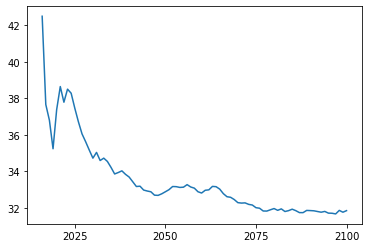

In [203]:
plt.plot(x, y)

In [ ]:
da_RR2.time

In [171]:
SSP1_2_6_GC_dght_RAI['cmip6_download_access_cm2']

<xarray.DataArray 'pr' (time: 86)>
array([61.11111111, 58.33333333, 46.2962963 , 51.38888889, 43.33333333,
       36.11111111, 38.88888889, 46.52777778, 51.85185185, 48.88888889,
       51.01010101, 46.75925926, 43.58974359, 40.47619048, 40.37037037,
       37.84722222, 35.94771242, 33.95061728, 32.16374269, 31.11111111,
       29.62962963, 32.32323232, 34.05797101, 32.63888889, 31.33333333,
       31.62393162, 30.4526749 , 30.75396825, 30.651341  , 29.62962963,
       28.67383513, 30.20833333, 29.7979798 , 29.41176471, 30.        ,
       30.09259259, 30.78078078, 29.97076023, 30.76923077, 30.27777778,
       31.30081301, 30.55555556, 31.1369509 , 30.80808081, 31.60493827,
       31.03864734, 31.20567376, 31.48148148, 31.06575964, 31.33333333,
       32.35294118, 31.73076923, 32.59958071, 32.20164609, 32.82828283,
       32.24206349, 33.13840156, 33.7164751 , 33.80414313, 33.33333333,
       32.87795993, 33.06451613, 33.15696649, 32.72569444, 33.07692308,
       32.82828283, 32.58706468, 32.10784314, 31.80354267, 32.06349206,
       32.7856025 , 32.71604938, 33.33333333, 33.55855856, 33.18518519,
       33.47953216, 34.1991342 , 34.18803419, 33.75527426, 33.40277778,
       32.99039781, 32.58807588, 33.19946452, 33.66402116, 33.59477124,
       33.33333333])
Dimensions without coordinates: time

In [178]:
np.count_nonzero(SSP1_2_6_GC_dght_output[1])

86

In [ ]:
fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(16,14), sharex=False)
ax = axes.flatten()
fig.subplots_adjust(top=0.9, left=0.1,right=0.95, bottom=0.1)

for j, zone in enumerate(zones):
    
    #print(da_data)
    
    
    for i,mod in enumerate(models):
        file = glob(os.path.join(path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
    
        if zone == 'Guinea Coast':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice(str(ystart),str(yend)))#.mean(['lon','lat'])
            da_RR = s* 86400   #convert rainfall from kg m-2 s-1 to mm/day
            sampled_da = da_RR.resample(time='1D').sum('time')
            b = myfunct1.rai(sampled_da, 'time','ordinary')
            ba1 = myfunct1.trends_eval(b, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)
            
            output = ba1.mean(['lon', 'lat']).cumsum('time')/range(1,ba1['time'].size+1)*100
            output.plot(ax=ax[j])
            if i==0:
                ensemble = output
            else:
                ensemble = (ensemble + ensemble)/2
                
            ensemble.plot(ax=ax[j], color='k',linewidth=3)
            ax[j].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)', ylim=(42,85))
          
        elif zone == 'Sahel':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice(str(ystart),str(yend))).mean(['lon','lat'])
            da_RR = s* 86400   #convert rainfall from kg m-2 s-1 to mm/day
            sampled_da = da_RR.resample(time='1D').sum('time')
            b = myfunct1.rai(sampled_da, 'time','ordinary')
            ba2 = myfunct1.trends_eval(b, case='drought', threshold=-1, ttype='point', dim='time', lons=None, 
                              lats=None, start_year=None, stop_year=None, set_historical=False, historical_year=None)
            output = ba2.cumsum('time')/range(1,ba2['time'].size+1)*100

            ax[j].plot(output)
            if i==0:
                ensemble = output
            else:
                ensemble = (ensemble + ensemble)/2
                
            ax[j].plot(ensemble, color='k',linewidth=3)
            ax[j].set(title=(zone), xlabel='time (year)',ylabel='Percentage of Drought occurence (%)', ylim=(42,85))
            #plt.legend()
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice(str(ystart),str(yend))).mean(['lon','lat'])
            da_RR = s* 86400   #convert rainfall from kg m-2 s-1 to mm/day
            sampled_da = da_RR.resample(time='1D').sum('time')
            b = myfunct1.rai(sampled_da, 'time','ordinary')
            ba3 = myfunct1.trends_eval(b, case='drought', threshold=-1, ttype='point', dim='time', lons=None, 
                              lats=None, start_year=None, stop_year=None, set_historical=False, historical_year=None)
            output = ba3.cumsum('time')/range(1,ba3['time'].size+1)*100
            ax[j].plot(output, label=mod[15:])
            if i==0:
                ensemble = output
            else:
                ensemble = (ensemble + ensemble)/2
                
            ax[j].plot(ensemble, color='k',linewidth=3)
            ax[j].set(title=(zone), xlabel='time (year)', ylabel='Percentage of Drought occurence (%)', ylim=(42,85))
            fig.legend( labelspacing=1.5, bbox_to_anchor=(0.95, 0.4), fontsize= 'large', ncol=3)
        
fig.suptitle('SSP1_2_6 Trends in Drought Cases using RAI(Daily-Ord) for Various Zones in West Africa (2015-2100)', fontsize=22)
fig.delaxes(ax[3])

#myfunct1.save_plot('/home/receiver/Desktop/Data/plots(trends)/','SSP1_2_6 Trend_Drt RAI(Daily-ord)')

In [295]:
RAI_hist_GC_fld_ensemble

<xarray.DataArray 'pr' (time: 65)>
array([16.66666667, 19.44444444, 33.33333333, 48.61111111, 42.22222222,
       45.37037037, 42.85714286, 38.19444444, 36.41975309, 38.88888889,
       36.86868687, 34.72222222, 36.32478632, 34.12698413, 37.03703704,
       37.15277778, 36.60130719, 35.18518519, 33.33333333, 33.61111111,
       36.24338624, 34.5959596 , 33.09178744, 32.63888889, 32.88888889,
       31.83760684, 30.86419753, 33.13492063, 32.56704981, 31.66666667,
       31.1827957 , 31.94444444, 31.14478114, 30.39215686, 29.52380952,
       29.01234568, 28.97897898, 28.21637427, 29.2022792 , 28.61111111,
       28.04878049, 27.38095238, 27.77777778, 28.78787879, 28.51851852,
       28.98550725, 28.72340426, 28.35648148, 27.77777778, 28.77777778,
       28.32244009, 29.48717949, 29.03563941, 28.49794239, 28.48484848,
       28.07539683, 28.07017544, 28.35249042, 27.96610169, 28.14814815,
       27.77777778, 27.41935484, 28.39506173, 28.38541667, 28.03418803])
Dimensions without coordinates: time

In [310]:
fig,axes = plt.subplots(ncols=2, nrows=3, figsize=(16,14), sharex=False)
ax = axes.flatten()
fig.subplots_adjust(top=0.9, left=0.1,right=0.95, bottom=0.1)

ystart = 2014

for j, zone in enumerate(zones):
    
    for i,mod in enumerate(hist_mod):
        file = glob(os.path.join(hist_path,'historical'+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(hist_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
    
        if zone == 'Guinea Coast':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
            
            RAI_dght_ensemble.plot(ax=ax[0], color='k',linewidth=3)
            ax[0].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[1], color='k',linewidth=3)
            ax[1].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
          
        elif zone == 'Sahel':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
             
            RAI_dght_ensemble.plot(ax=ax[2], color='k',linewidth=3)
            ax[2].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[3], color='k',linewidth=3)
            ax[3].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR1 = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR1, 'time','ordinary'); c2 = sai(da_RR1, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
            #RAI_dght_ensemble.plot(ax=ax[4], color='k',linewidth=3)
            ax[4].plot(da_RR1.time, RAI_dght_ensemble, color = 'k', linewidth=3)
            ax[4].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[5], color='k',linewidth=3)
            ax[5].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')    

    
    for i,mod in enumerate(SSP1_1_9_mod):
        file = glob(os.path.join(SSP1_1_9_path,exp+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(SSP1_1_9_path,mod+'/pr*'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
    
        if zone == 'Guinea Coast':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice(str(ystart),str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
            
            RAI_dght_ensemble.plot(ax=ax[0], color='r',linewidth=3)
            ax[0].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[1], color='r',linewidth=3)
            ax[1].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
          
        elif zone == 'Sahel':
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(12,20), time=slice(str(ystart),str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
             
            RAI_dght_ensemble.plot(ax=ax[2], color='r',linewidth=3)
            ax[2].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[3], color='r',linewidth=3)
            ax[3].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            
        else:
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(8,12), time=slice(str(ystart),str(yend)))#.mean(['lon','lat'])
            da_RR = (s* 86400).resample(time='1Y').mean('time')
            c1 = rai(da_RR, 'time','ordinary'); c2 = sai(da_RR, 'time')

            ######## Drought Assessment
            eval_dght_c1 = trends_eval(c1, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            eval_dght_c2 = trends_eval(c2, case='drought', threshold=-1, ttype='point', dim='time', 
                              lons=None, lats=None, start_year=None, stop_year=None, 
                              set_historical=False, historical_year=None)

            RAI_dght_output = eval_dght_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_dght_output = eval_dght_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_dght_ensemble = RAI_dght_output
                SAI_dght_ensemble = SAI_dght_output
            else:
                RAI_dght_ensemble = (RAI_dght_ensemble + RAI_dght_ensemble)/2
                SAI_dght_ensemble = (SAI_dght_ensemble + SAI_dght_ensemble)/2
            
            ##### Flood Assessment
            eval_fld_c1 = trends_eval(c1, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)

            eval_fld_c2 = trends_eval(c2, case='flood', threshold=1, ttype='point', dim='time', 
                          lons=None, lats=None, start_year=None, stop_year=None, 
                          set_historical=False, historical_year=None)
            
            RAI_fld_output = eval_fld_c1.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c1['time'].size+1)*100
            SAI_fld_output = eval_fld_c2.mean(['lon', 'lat']).cumsum('time')/range(1,eval_dght_c2['time'].size+1)*100

            if i==0:
                RAI_fld_ensemble = RAI_fld_output
                SAI_fld_ensemble = SAI_fld_output
            else:
                RAI_fld_ensemble = (RAI_fld_ensemble + RAI_fld_ensemble)/2
                SAI_fld_ensemble = (SAI_fld_ensemble + SAI_fld_ensemble)/2
            #RAI_dght_ensemble.plot(ax=ax[4], color='r',linewidth=3)
            ax[4].plot(da_RR.time, RAI_dght_ensemble, color = 'r', linewidth=3)
            ax[4].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')
            RAI_fld_ensemble.plot(ax=ax[5], color='r',linewidth=3)
            ax[5].set(title=(zone), xlabel='time (year)',  ylabel='Percentage of Drought occurence (%)')    

#fig.suptitle('SSP1_2_6 Trends in Drought Cases using RAI(Daily-Ord) for Various Zones in West Africa (2015-2100)', fontsize=22)
#fig.delaxes(ax[3])

#save_plot('/home/receiver/Desktop/Data/plots(trends)/','SSP1_2_6 Trend_Drt RAI(Daily-ord)')

OverflowError: time values outside range of 64 bit signed integers

In [97]:
for j, zone in enumerate(zones):
    for i,mod in enumerate(hist_mod):
      
        file = glob(os.path.join(hist_path,'historical'+'/*'+mod+'*.zip'))[0]
        data_file = glob(os.path.join(hist_path,mod+'/pr*'+'historical'+'*.nc'))[0]
        da_data = xr.open_dataset(data_file)
        
        
        
        if zone == 'Guinea Coast':
            
            s = da_data.pr.sel(lon=slice(-17,17), lat=slice(4,8), time=slice('1950','2014'))#.mean(['lon','lat'])
            da_RR1 = (s* 86400).resample(time='Y').mean('time')

In [130]:
da_RR1

<xarray.DataArray 'pr' (time: 65, lat: 3, lon: 6)>
array([[[1.7112385 , 1.10291234, 0.91488829, 2.02723134, 2.54241435,
         6.19637207],
        [2.30674357, 2.53090065, 2.41535539, 0.91966923, 1.22671938,
         3.36442632],
        [3.25234588, 3.14214119, 3.34936492, 3.19142312, 3.00437149,
         2.97631524]],

       [[1.27682786, 0.96106226, 0.79140369, 1.24764331, 2.09702372,
         5.83895253],
        [1.81125511, 2.07050929, 2.11635894, 0.5950851 , 1.06253962,
         2.84350701],
        [2.98376705, 2.84278143, 2.77855359, 2.52595931, 2.50569248,
         2.521255  ]],

       [[1.47184535, 1.0816879 , 1.00845963, 1.81604147, 2.34593967,
         5.71949955],
        [1.93382224, 2.31818862, 2.29700462, 0.69948304, 0.74800419,
         2.30330586],
        [2.89568092, 2.89156831, 2.97608991, 2.79714264, 2.65911794,
         2.56005592]],
...
       [[2.36833366, 1.80572178, 1.40195906, 2.14749979, 2.89132741,
         7.27660041],
        [2.22296754, 2.50282028, 2.44081063, 1.01693629, 1.29182767,
         3.68899969],
        [3.08894266, 3.45275427, 3.00258614, 2.93401164, 2.94389942,
         2.81910583]],

       [[2.25896101, 1.45534608, 1.24706551, 2.48455951, 3.18957832,
         6.93103231],
        [2.09669679, 2.4546594 , 2.23486822, 0.79975602, 0.99679777,
         3.24501172],
        [2.69690245, 3.14799022, 2.83116522, 2.91464407, 2.75767018,
         2.77211361]],

       [[2.06005029, 1.70185651, 1.76763042, 2.63549594, 3.27853433,
         7.39256272],
        [2.52288881, 2.75020355, 2.77957663, 1.08377748, 1.36483442,
         3.760823  ],
        [3.39575051, 3.52232488, 3.1290627 , 3.17094792, 2.99781281,
         2.97230207]]])
Coordinates:
  * time     (time) object 1950-12-30 00:00:00 ... 2014-12-30 00:00:00
  * lat      (lat) float64 4.375 5.625 6.875
  * lon      (lon) float64 -4.688 -2.812 -0.9375 0.9375 2.812 4.688

In [324]:
da = []

In [1]:
def create_date_table2(start='1950-01-01 00:00', end='2100-12-30 00:00'):
    df = pd.DataFrame({"Date": pd.date_range(start, end)})
    df["Day"] = df.Date.dt.day_name()
    df["Week"] = df.Date.dt.weekofyear
    df["Quarter"] = df.Date.dt.quarter
    df["Year"] = df.Date.dt.year
    df["Year_half"] = (df.Quarter + 1) // 2
    return df

In [5]:
create_date_table2().tail()

<ipython-input-1-396c1c4a5699>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.weekofyear


,Date,Day,Week,Quarter,Year,Year_half
55147,2100-12-27,Monday,52,4,2100,2
55148,2100-12-28,Tuesday,52,4,2100,2
55149,2100-12-29,Wednesday,52,4,2100,2
55150,2100-12-30,Thursday,52,4,2100,2
55151,2100-12-31,Friday,52,4,2100,2


In [160]:
from itertools import product
from cftime import DatetimeNoLeap
from cftime import Datetime360Day

'''
a  = pd.date_range(start='1950-12-01 00:00', end = '2014-12-30 00:00', freq='24h')
b = xr.Dataset({'time':a.astype(object)} )

for ay in a:
    if ay.month_name()=='February':
        print(ay, ay.daysinmonth)

#b.mean('dim_0')
#a.is_leap_year==True
#a.month_name()=='December'
b#.resample(time='Y')#.mean('time')
#datetime
'''

dates = [
    DatetimeNoLeap(year, month, 1)
    for year, month in product(range(1, 3), range(1, 13))
    ]

da = xr.DataArray(np.arange(24), coords=[dates], dims=["time"], name="foo")

In [163]:
dates=[Datetime360Day(2015, 12, 30)]

In [165]:
dates = xr.cftime_range(start="0001", periods=24, freq="MS", calendar="noleap")

da = xr.DataArray(np.arange(24), coords=[dates], dims=["time"], name="foo")

In [166]:
dates

CFTimeIndex([0001-01-01 00:00:00, 0001-02-01 00:00:00, 0001-03-01 00:00:00,
             0001-04-01 00:00:00, 0001-05-01 00:00:00, 0001-06-01 00:00:00,
             0001-07-01 00:00:00, 0001-08-01 00:00:00, 0001-09-01 00:00:00,
             0001-10-01 00:00:00, 0001-11-01 00:00:00, 0001-12-01 00:00:00,
             0002-01-01 00:00:00, 0002-02-01 00:00:00, 0002-03-01 00:00:00,
             0002-04-01 00:00:00, 0002-05-01 00:00:00, 0002-06-01 00:00:00,
             0002-07-01 00:00:00, 0002-08-01 00:00:00, 0002-09-01 00:00:00,
             0002-10-01 00:00:00, 0002-11-01 00:00:00, 0002-12-01 00:00:00],
            dtype='object', length=24, calendar='noleap', freq='MS')

distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


In [164]:
dates

[cftime.Datetime360Day(2015, 12, 30, 0, 0, 0, 0, has_year_zero=True)]

In [47]:
a.year

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            ...
            2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64', length=151)

In [40]:
b = a.astype(object)
a.is_leap_year

array([False, False, False, ..., False, False, False])

In [70]:
idx = pd.date_range("2012-01-01", "2022-12-31", freq="Y")
idx.is_leap_year
idx

for i,j in enumerate(idx):
    if j.is_leap_year:
        print(i,j)


0 2012-12-31 00:00:00
4 2016-12-31 00:00:00
8 2020-12-31 00:00:00


In [21]:
b = xr.Dataset({'time': b})

In [34]:
b.resample(time = 'y').mean('time')#.time

<xarray.Dataset>
Dimensions:  (time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2100-12-31
Data variables:
    *empty*

In [36]:
b.time

<xarray.DataArray 'time' (time: 55152)>
array([Timestamp('1950-01-01 00:00:00', freq='D'),
       Timestamp('1950-01-02 00:00:00', freq='D'),
       Timestamp('1950-01-03 00:00:00', freq='D'), ...,
       Timestamp('2100-12-29 00:00:00', freq='D'),
       Timestamp('2100-12-30 00:00:00', freq='D'),
       Timestamp('2100-12-31 00:00:00', freq='D')], dtype=object)
Coordinates:
  * time     (time) object 1950-01-01 1950-01-02 ... 2100-12-30 2100-12-31